In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
from matplotlib import pyplot

In [1]:
from ReadData import *

In [2]:
well_number1, well_number2, well_number3, well_number4, well_number5, well_number6, well_number7, well_number8, well_number9, well_number10, well_number11, well_number12, WellName = ReadData()

In [3]:
WellName

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE', 'STUART', 'CRAWFORD'], dtype=object)

In [4]:
%cd ./logs
from lithologydisply import *
from log_well import *
%cd ../

d:\texas_data_set\Regularize\logs
d:\texas_data_set\Regularize


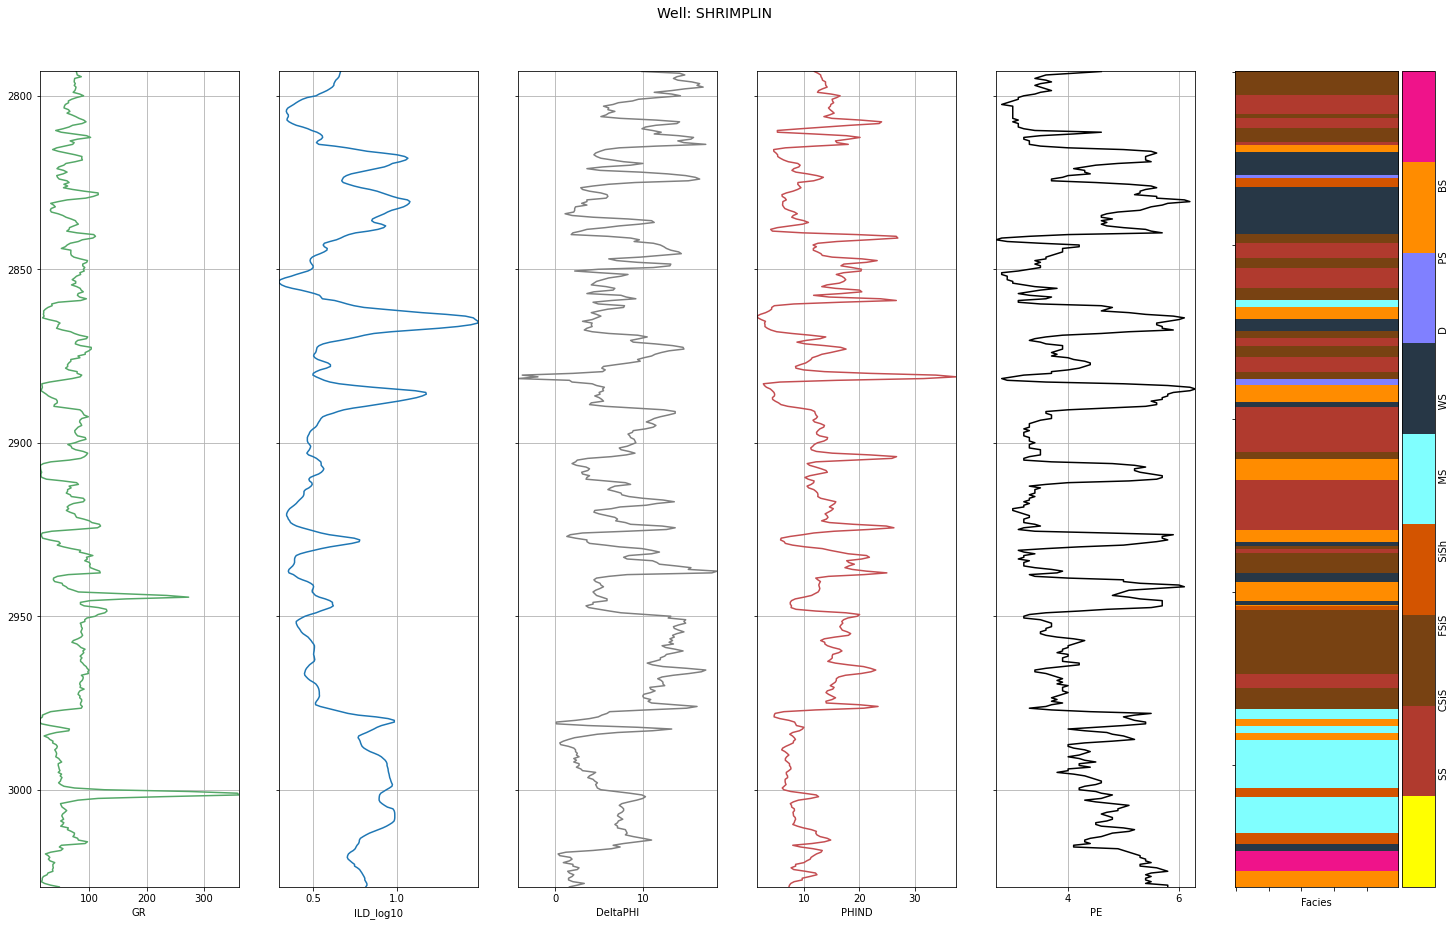

In [15]:
log_well(well_number1, well_number1['Depth'].min(), well_number1['Depth'].max())

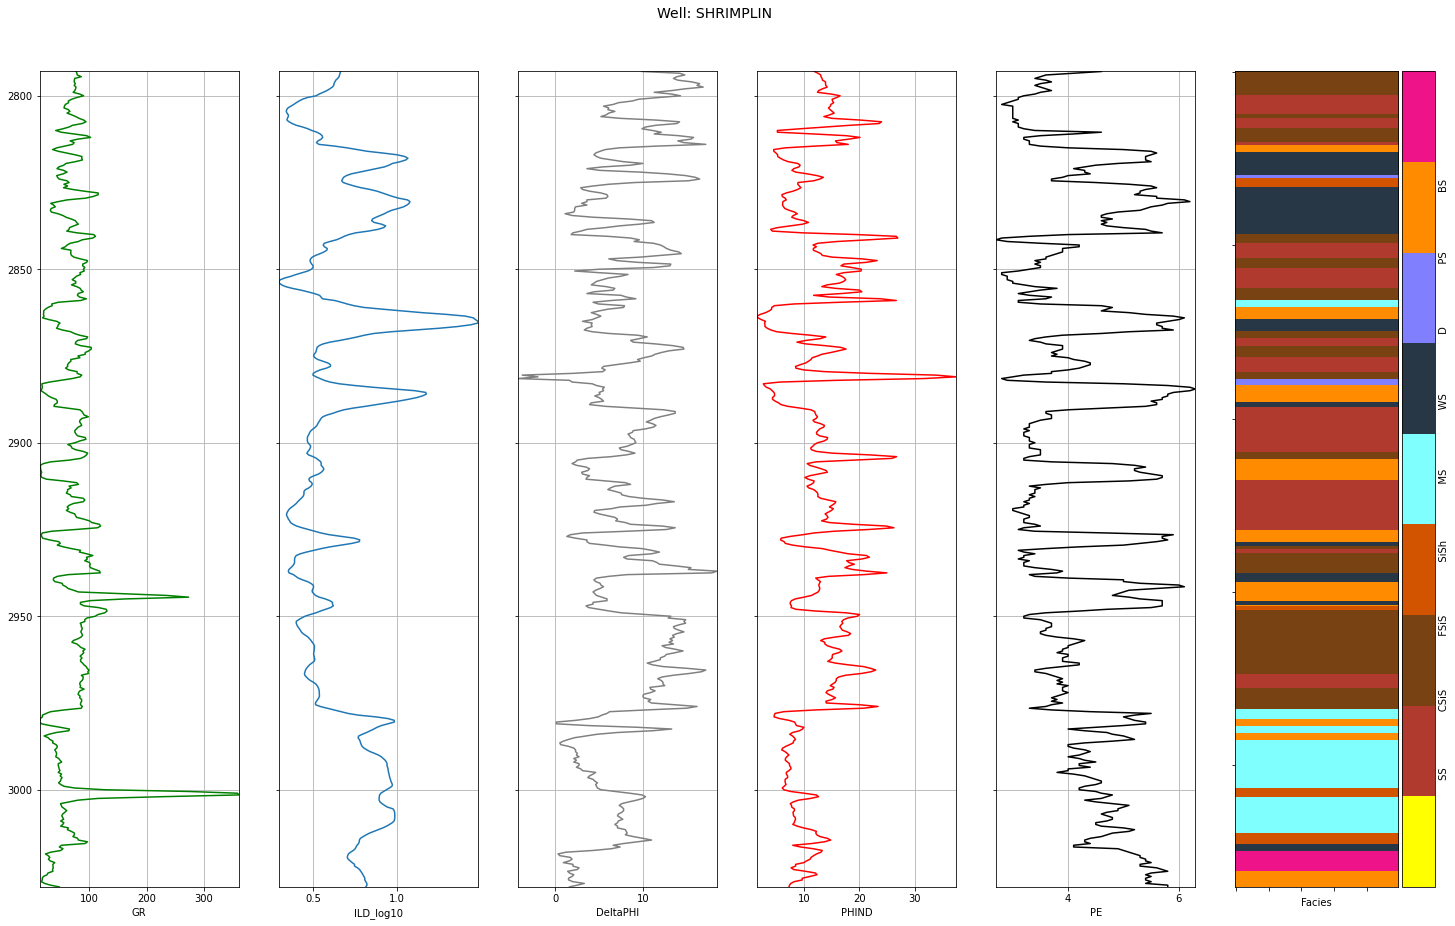

In [6]:
log_well(well_number1.sort_values("Depth"), well_number1['Depth'].min(), well_number1['Depth'].max())

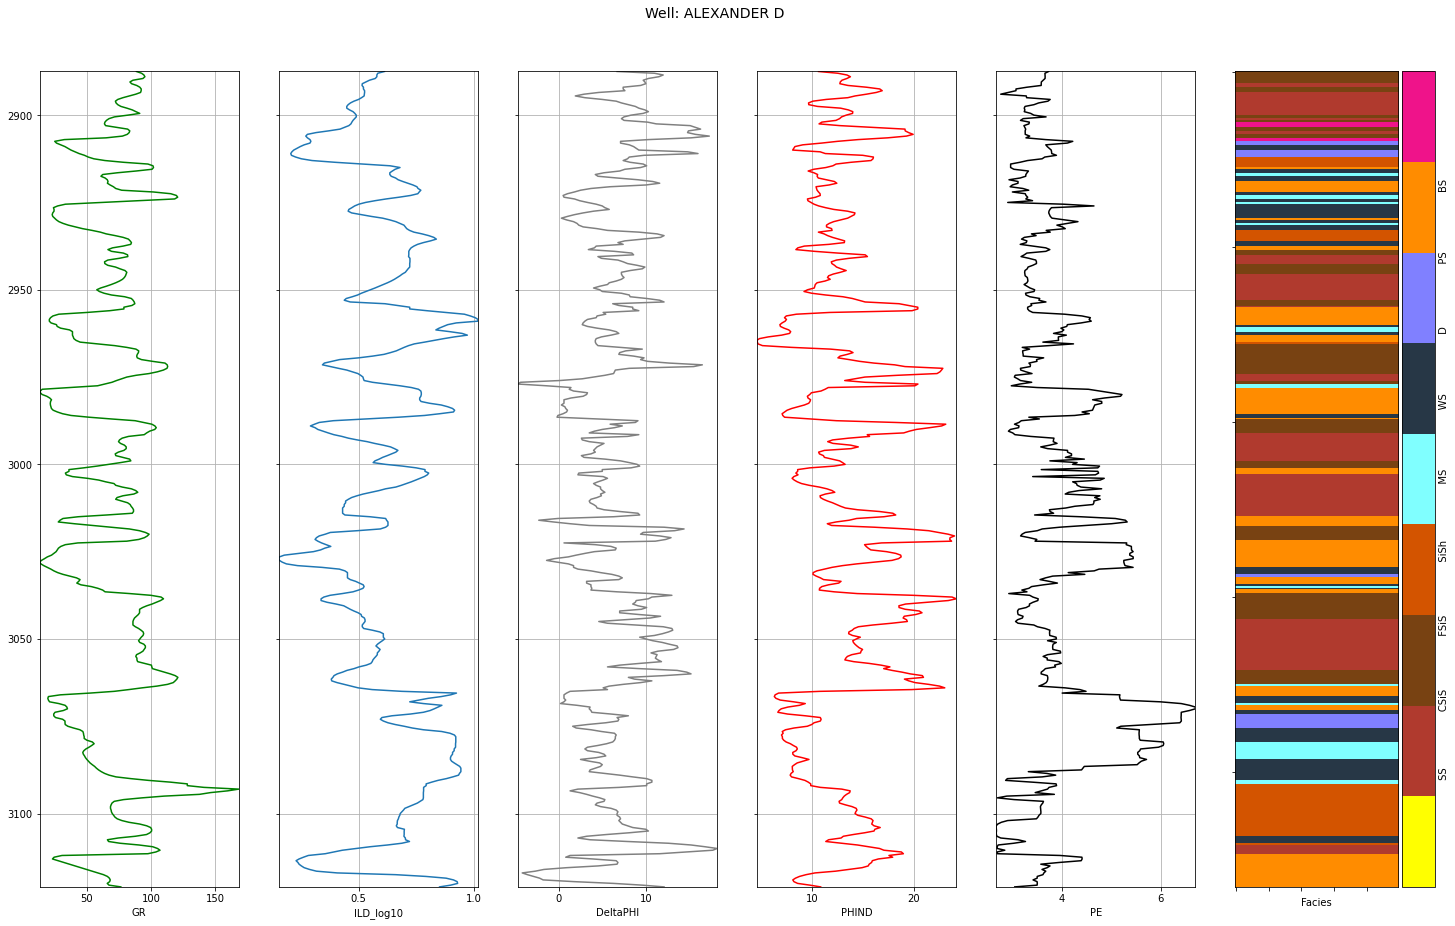

In [10]:
log_well(well_number2.sort_values("Depth"), well_number2['Depth'].min(), well_number2['Depth'].max())

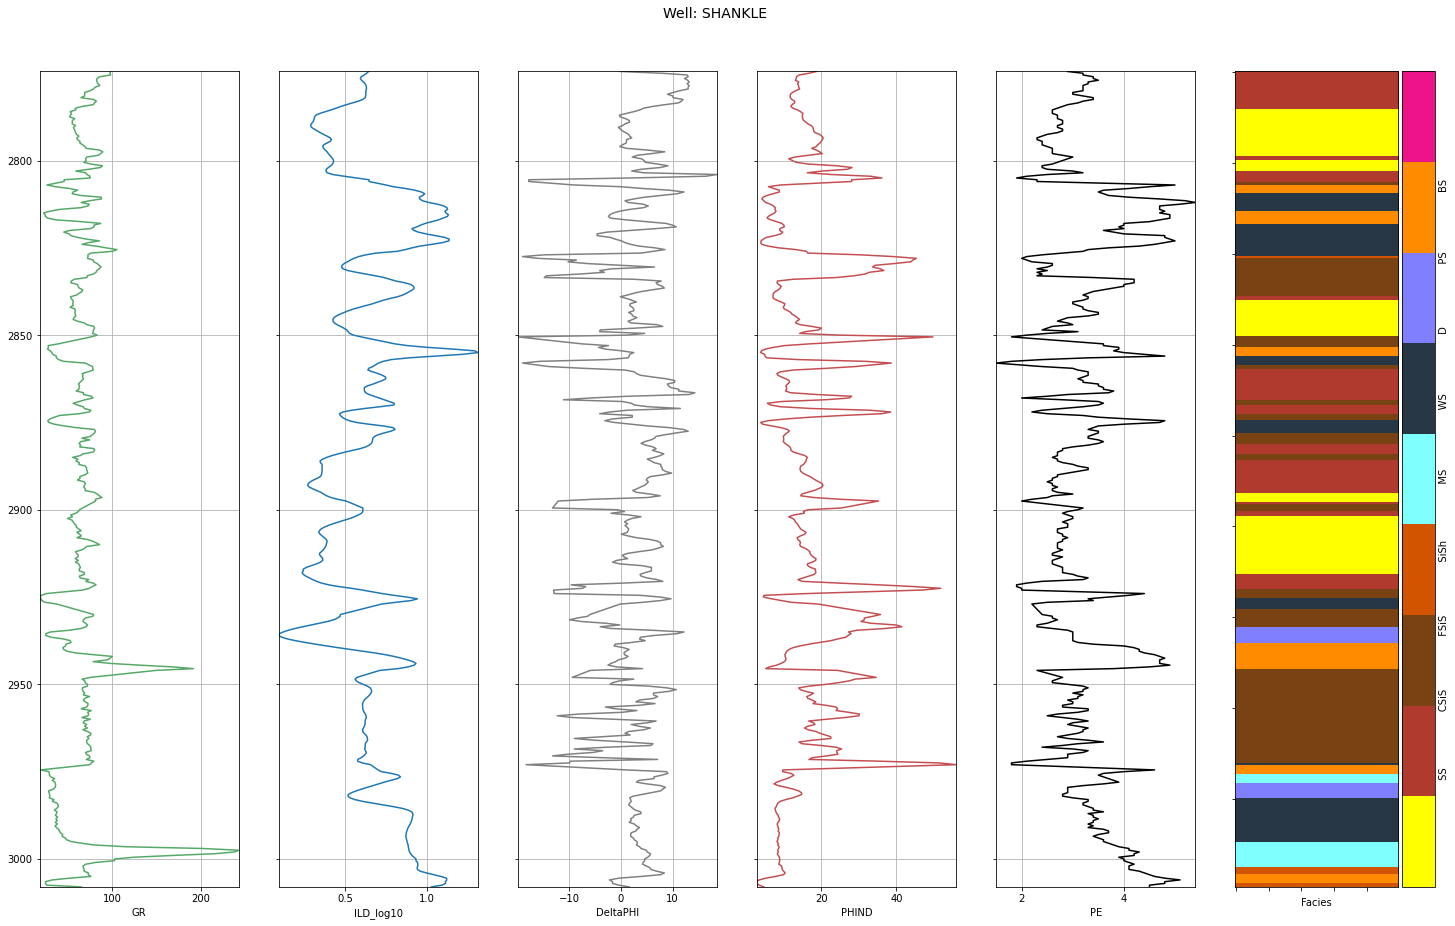

In [16]:
log_well(well_number3.sort_values("Depth"), well_number3['Depth'].min(), well_number3['Depth'].max())

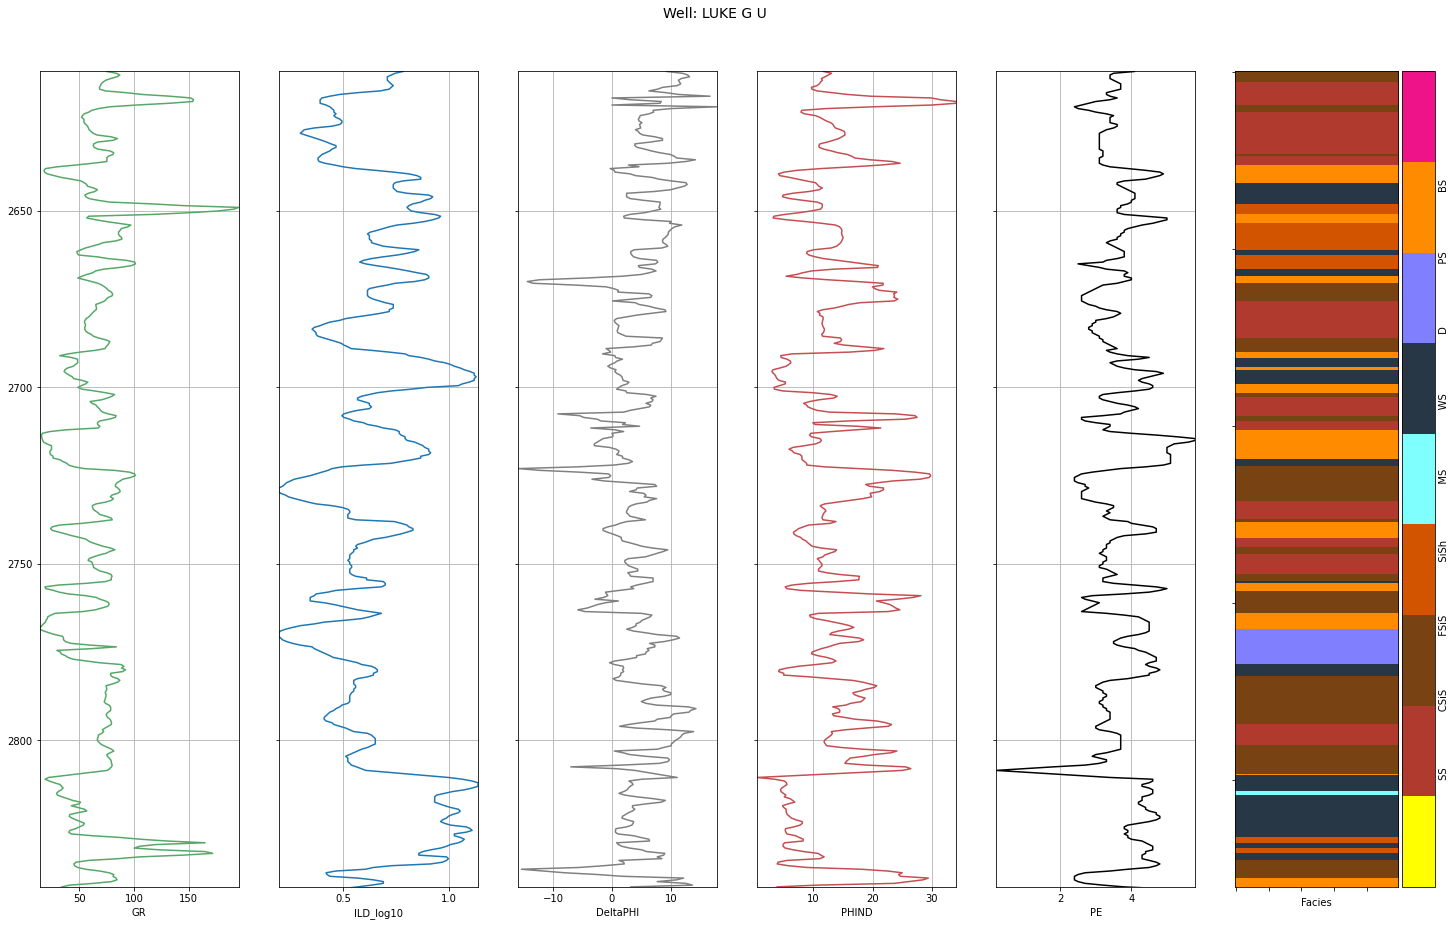

In [17]:
log_well(well_number4.sort_values("Depth"), well_number4['Depth'].min(), well_number6['Depth'].max())

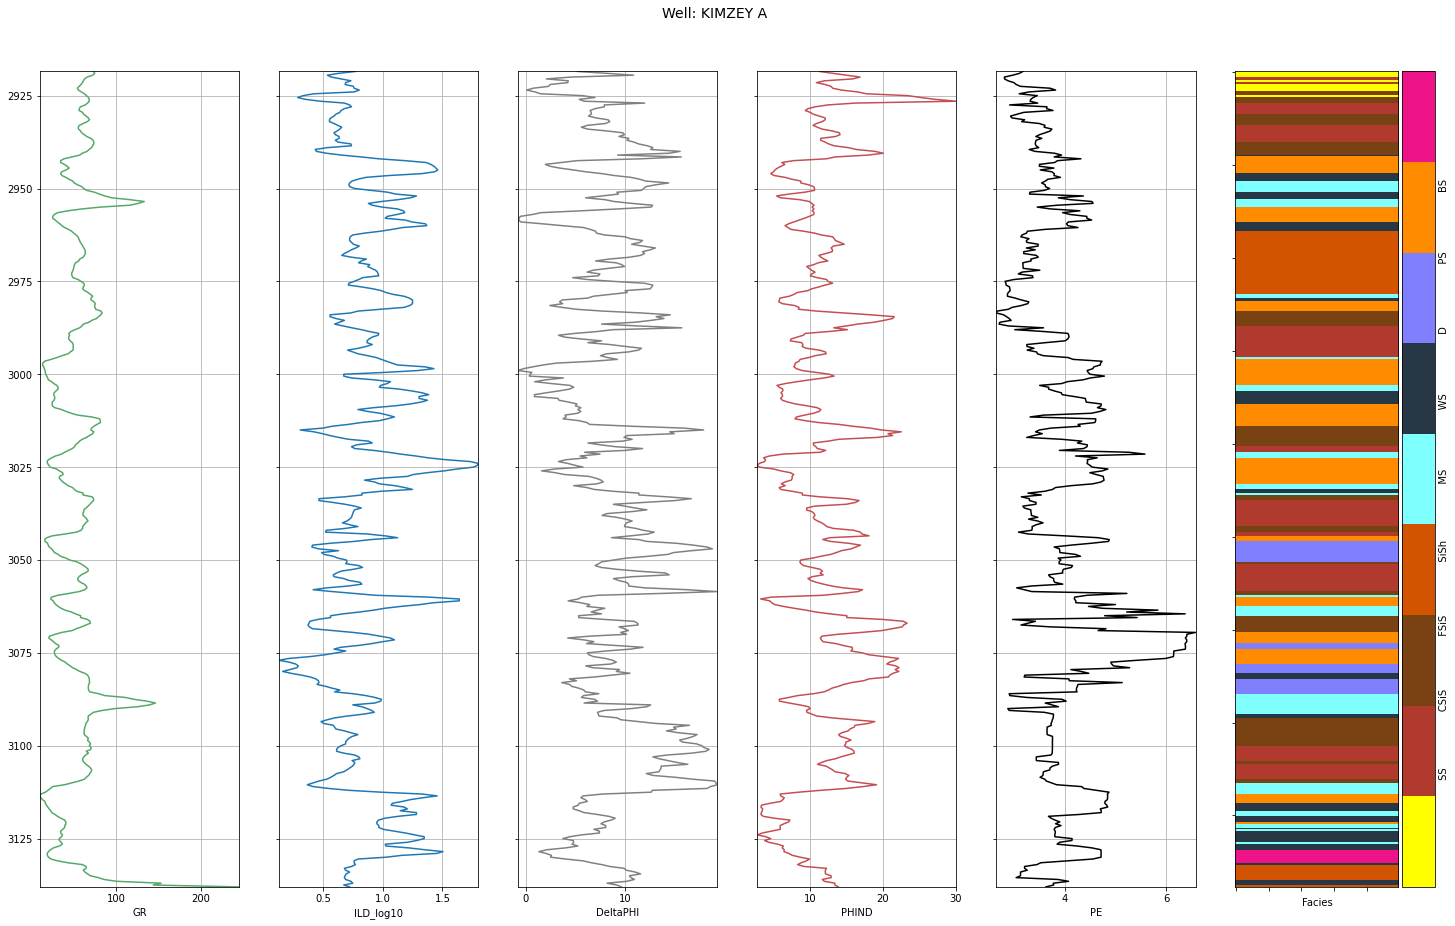

In [18]:
log_well(well_number5.sort_values("Depth"), well_number5['Depth'].min(), well_number5['Depth'].max())

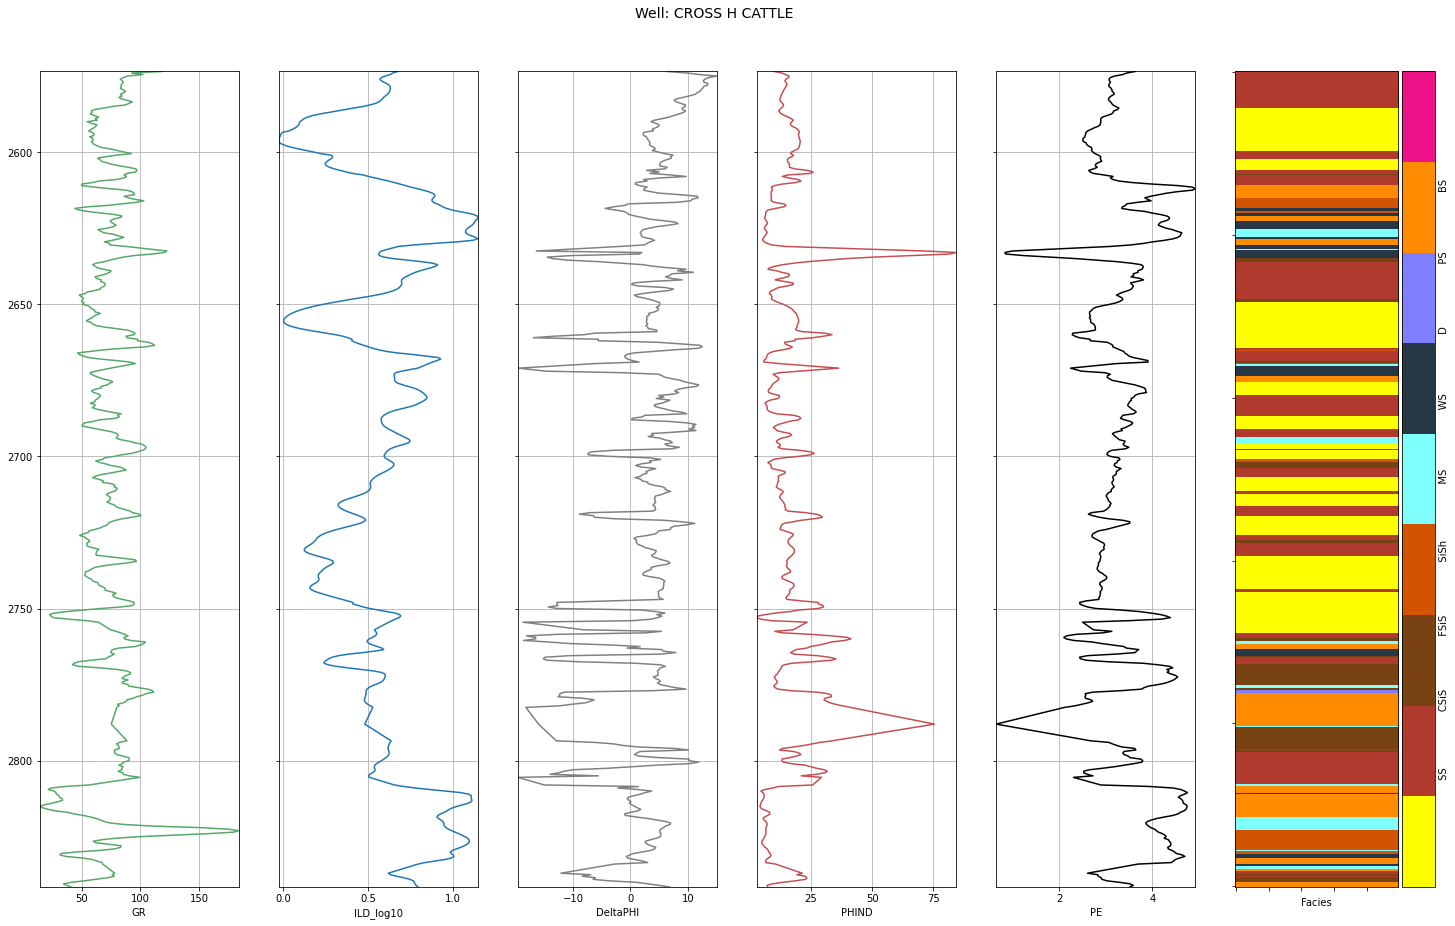

In [19]:
log_well(well_number6.sort_values("Depth"), well_number6['Depth'].min(), well_number6['Depth'].max())

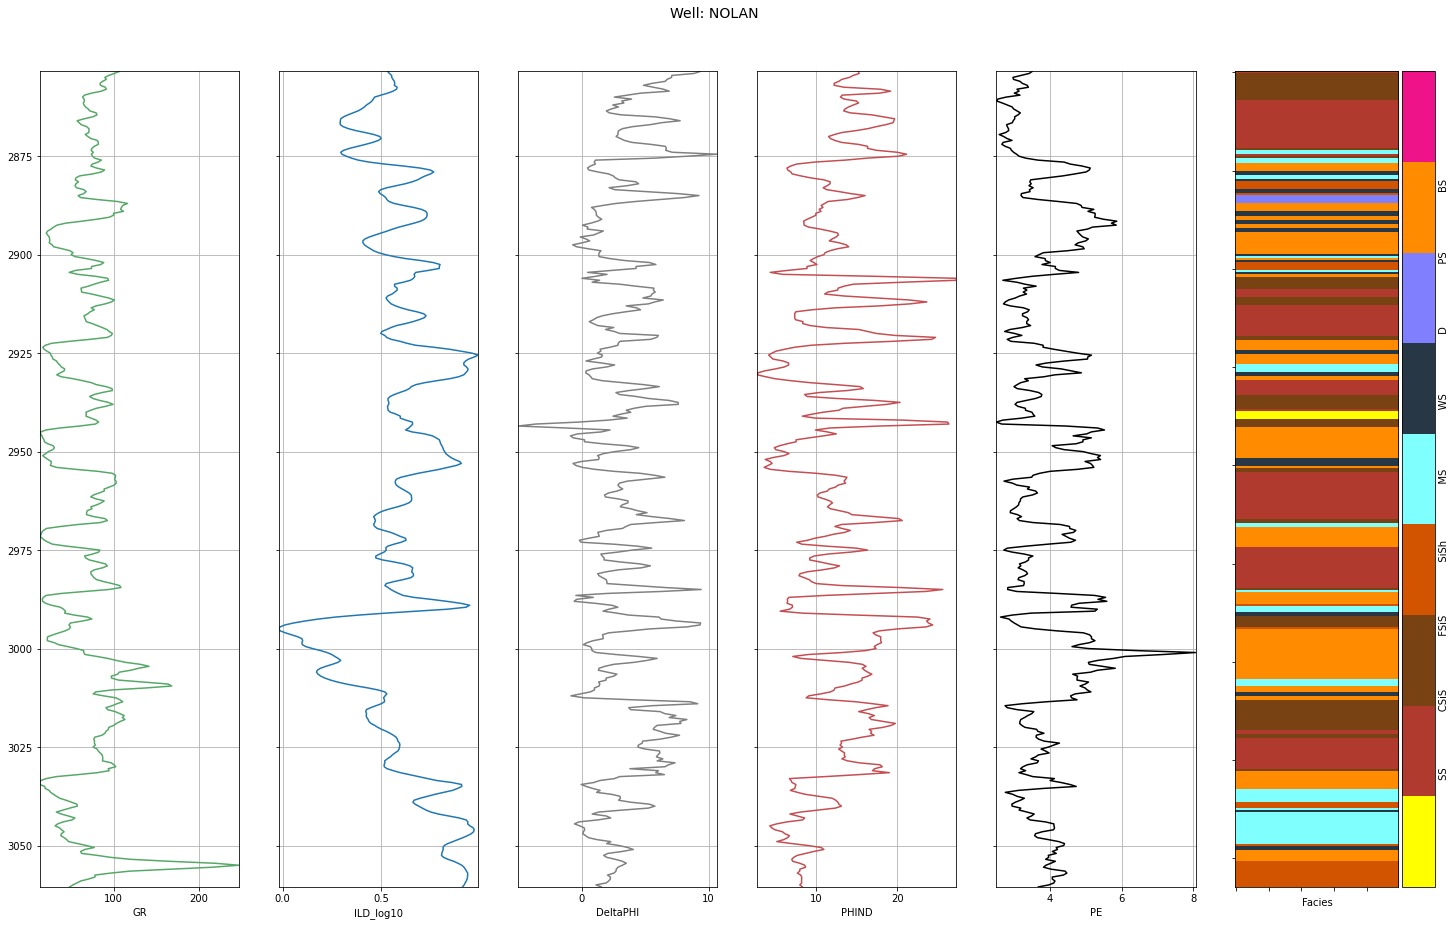

In [20]:
log_well(well_number7.sort_values("Depth"), well_number7['Depth'].min(), well_number7['Depth'].max())

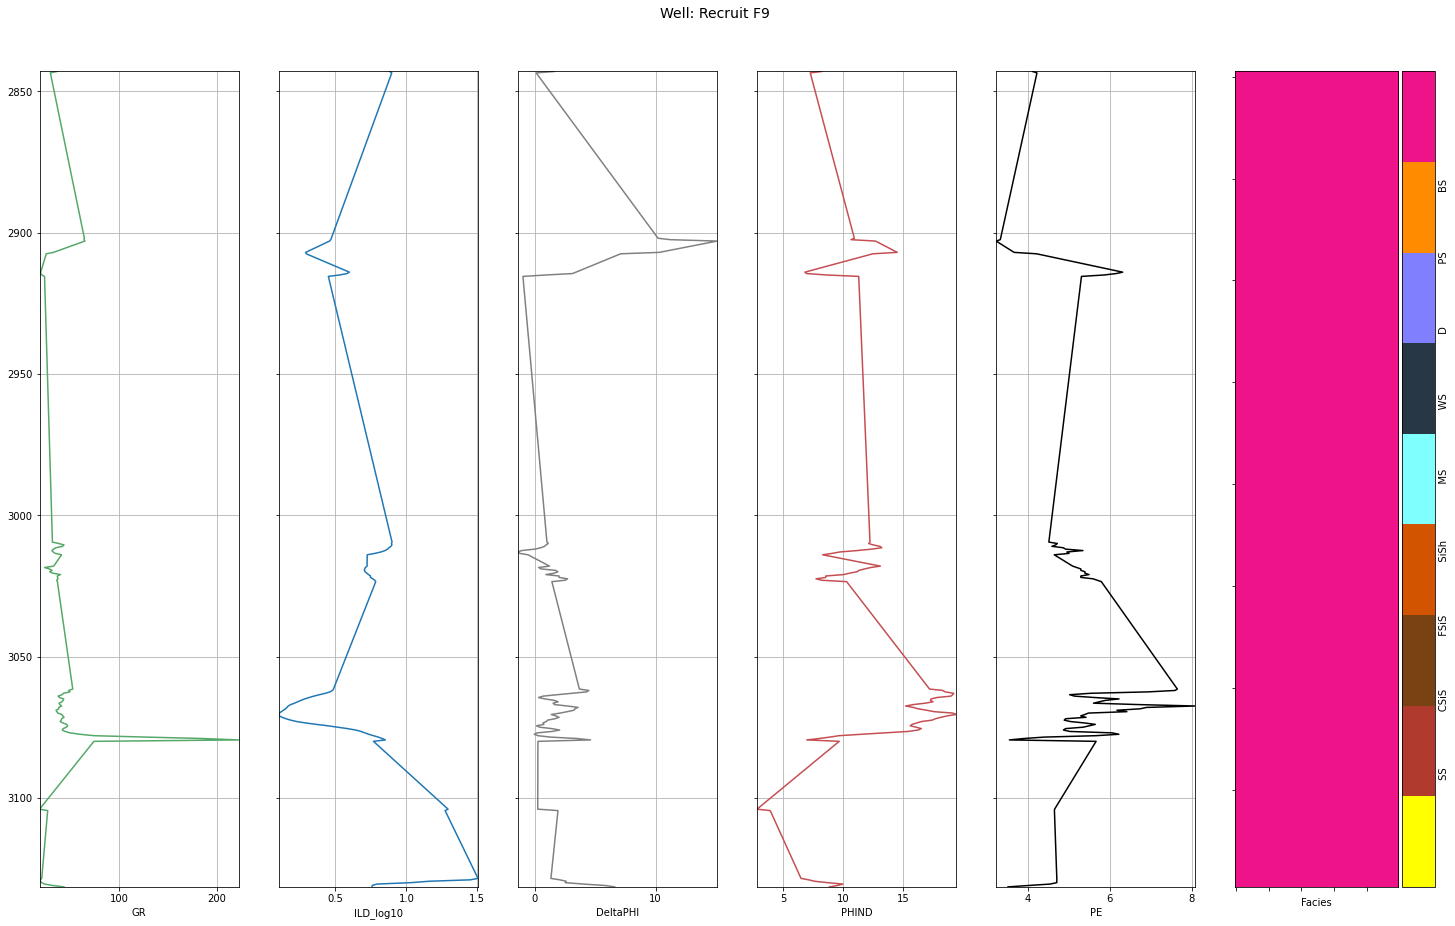

In [21]:
log_well(well_number8.sort_values("Depth"), well_number8['Depth'].min(), well_number8['Depth'].max())

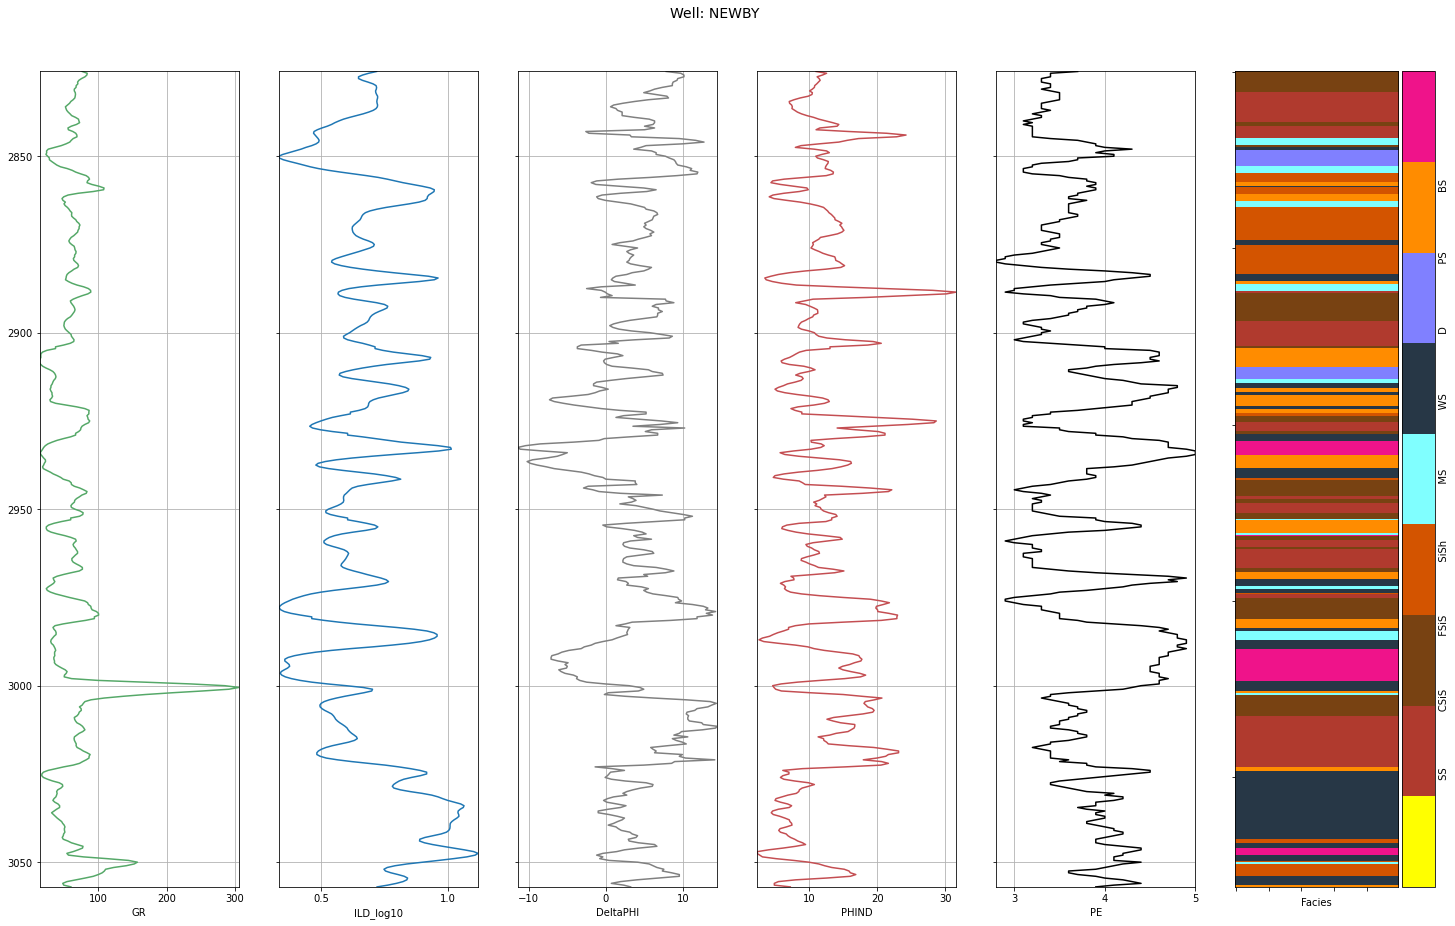

In [22]:
log_well(well_number9.sort_values("Depth"), well_number9['Depth'].min(), well_number9['Depth'].max())

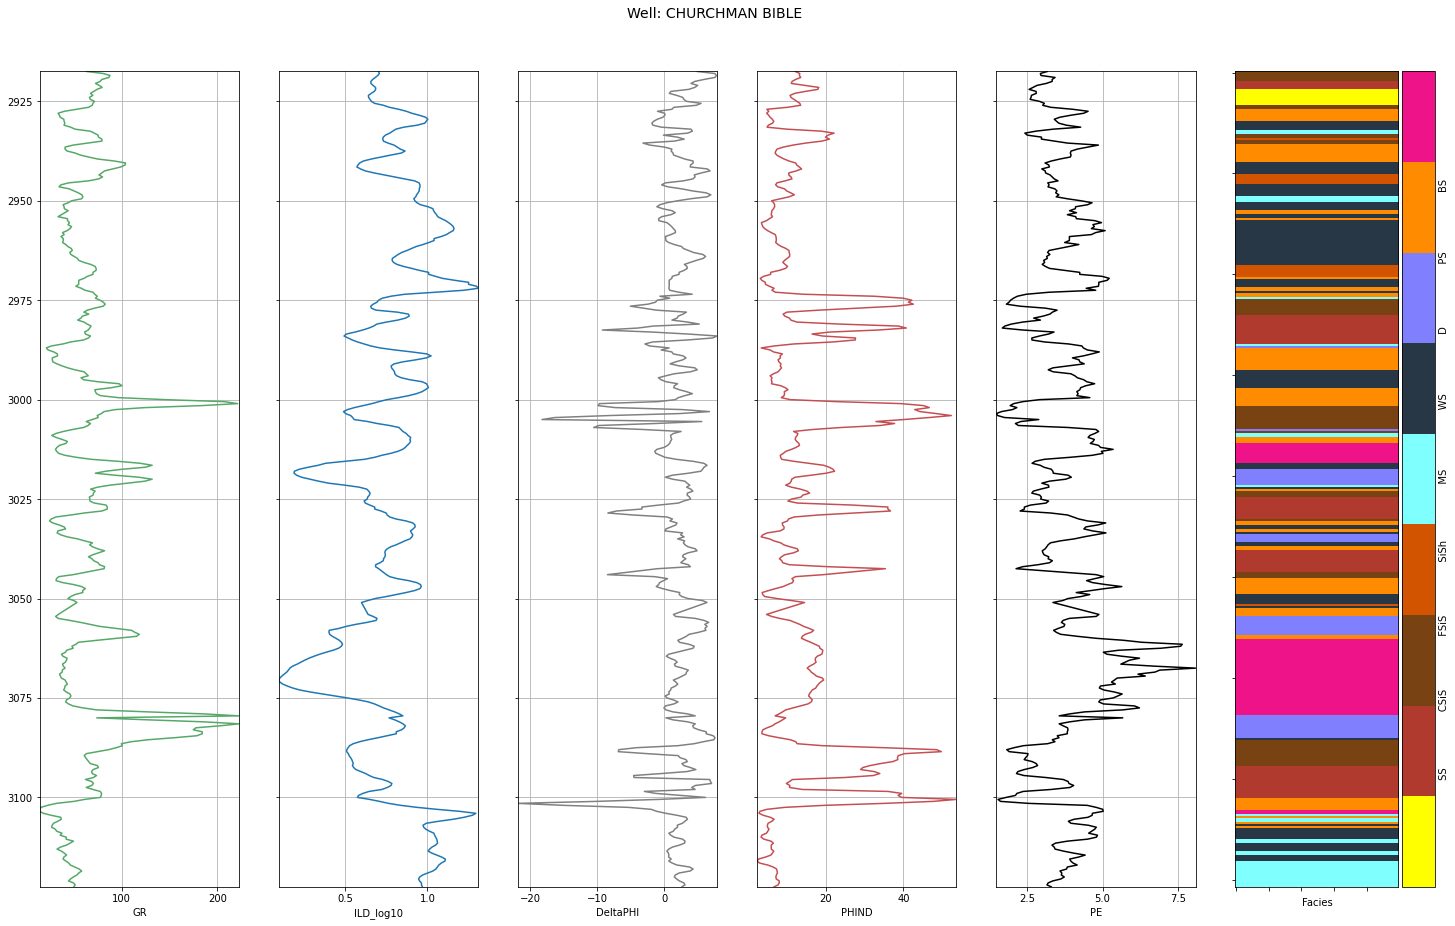

In [23]:
log_well(well_number10.sort_values("Depth"), well_number10['Depth'].min(), well_number10['Depth'].max())

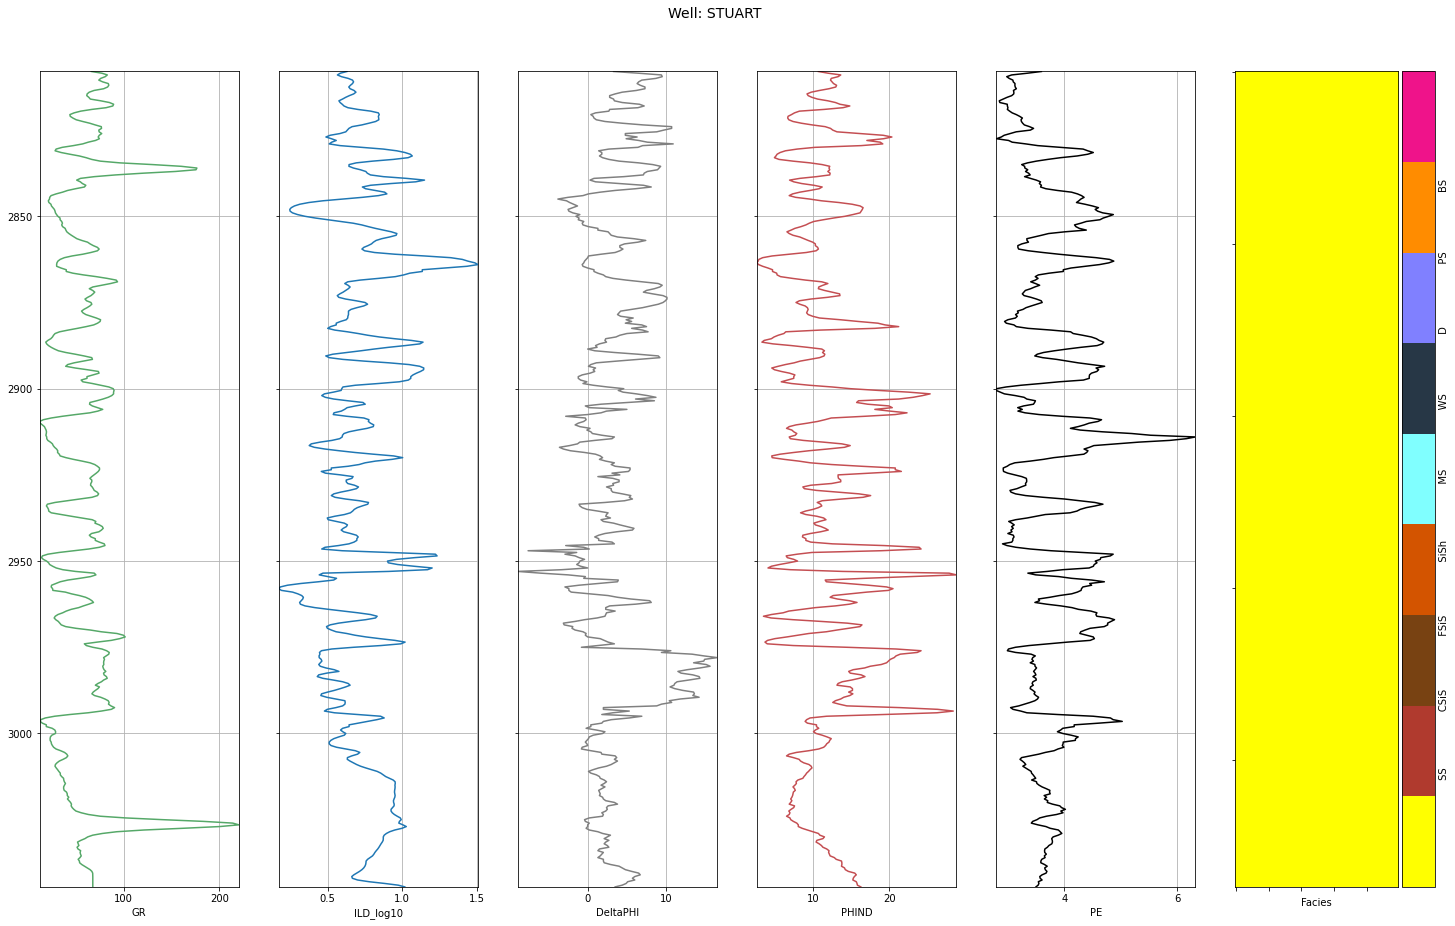

In [24]:
log_well(well_number11.sort_values("Depth"), well_number11['Depth'].min(), well_number11['Depth'].max())

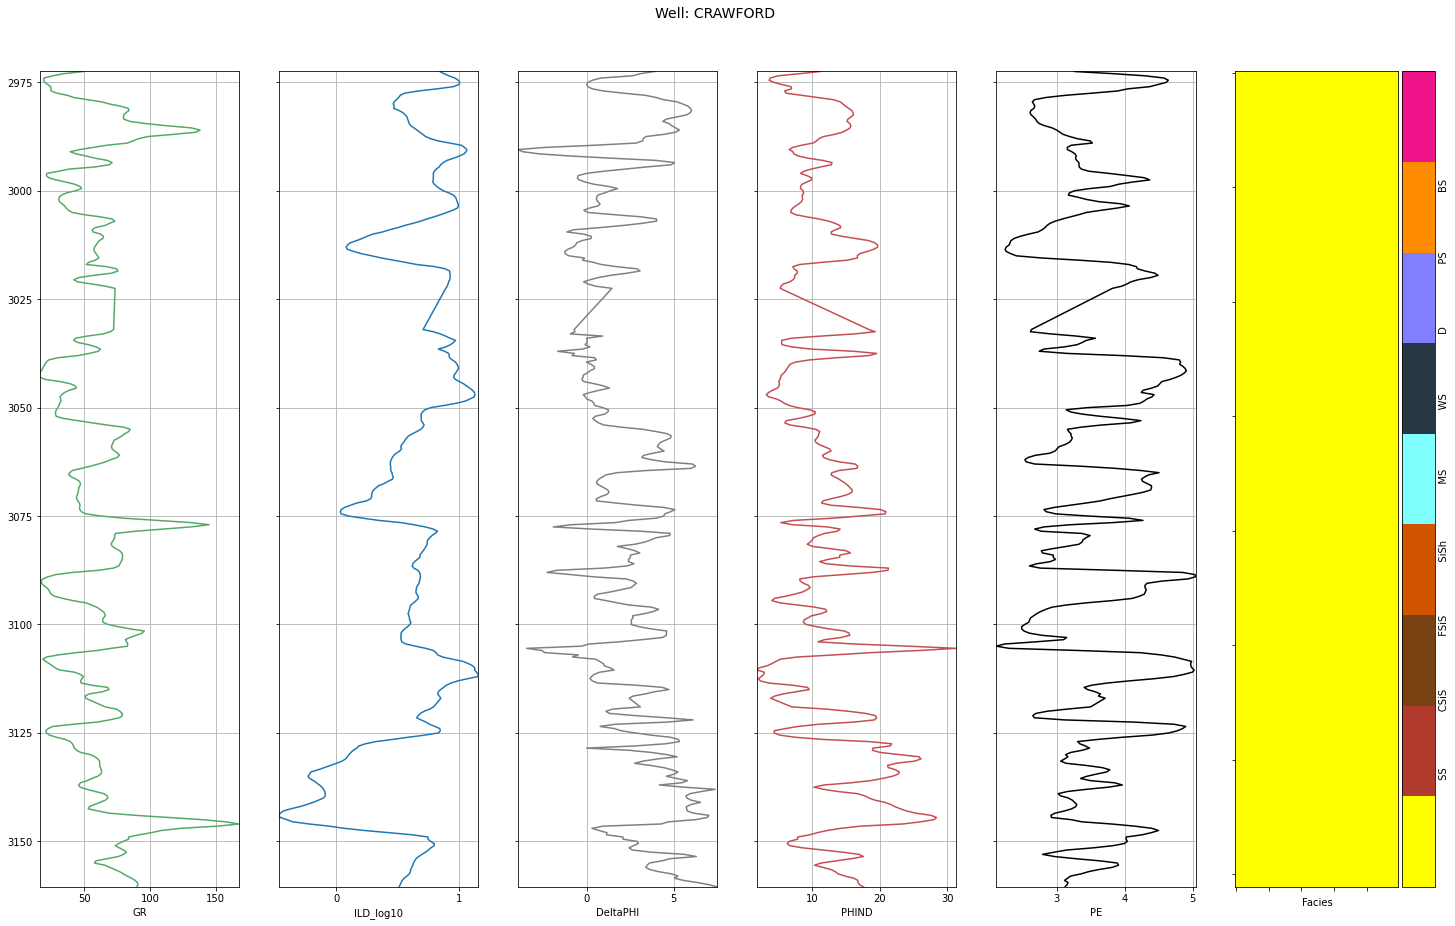

In [25]:
log_well(well_number12.sort_values("Depth"), well_number12['Depth'].min(), well_number12['Depth'].max())

In [11]:
training_data = pd.concat([well_number1, well_number2, well_number4, well_number5, well_number6, well_number7, well_number8, well_number9, well_number10])
test_data = well_number3

In [12]:
facies_colors = ['#ffff00', '#B03A2E','#784212','#D35400',
       '#80ffff','#273746', '#8080ff', '#ff8c00', '#ef138a']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]


def label_facies(row, labels):
    return labels[ row['Facies'] - 1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

SS      179
CSiS    851
FSiS    663
SiSh    264
MS      277
WS      511
D       124
PS      646
BS      185
Name: Facies, dtype: int64

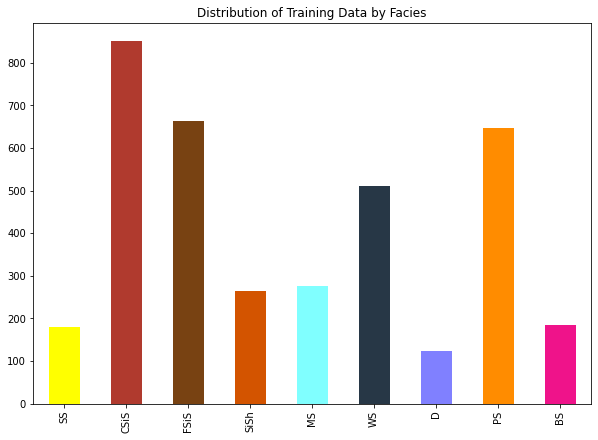

In [13]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels
plt.subplots(figsize=(10,7))
facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

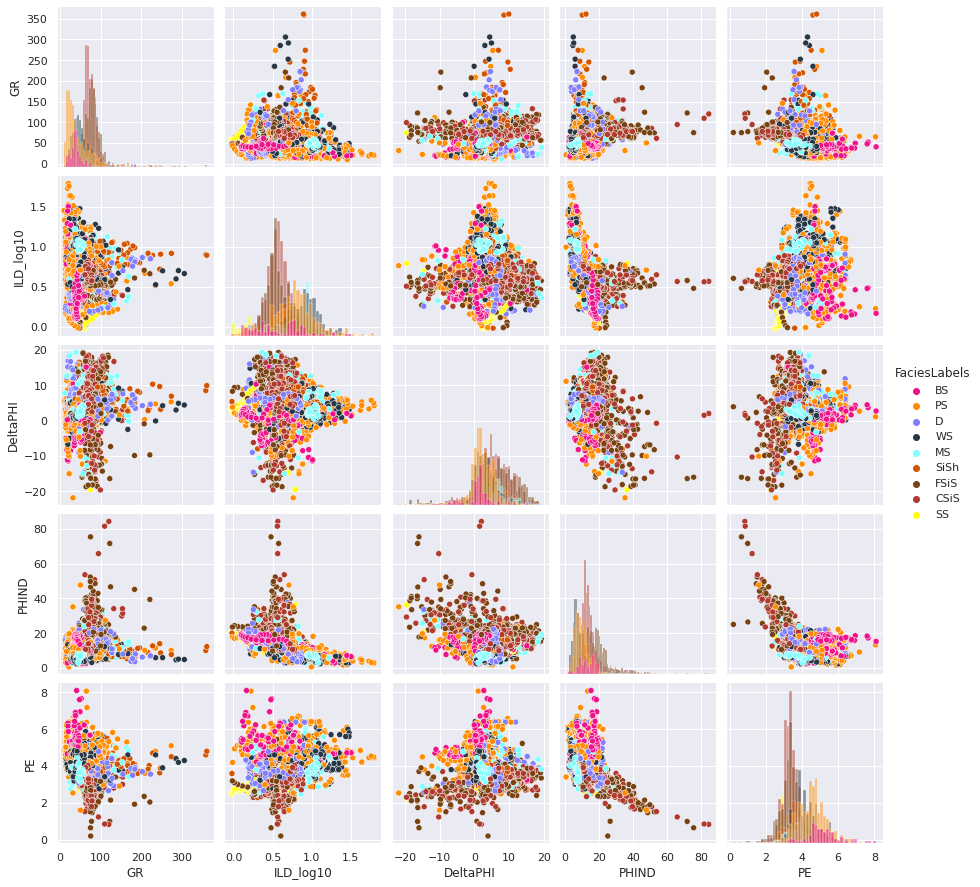

In [14]:
#save plot display settings to change back to when done plotting with seaborn
import seaborn as sns
inline_rc = dict(mpl.rcParams)


sns.set()
sns.pairplot(training_data.drop(['Well Name', 'Facies','Formation','Depth','NM_M','RELPOS'],axis=1),
             hue='FaciesLabels', palette=facies_color_map,
             hue_order=list(reversed(facies_labels)), diag_kind="hist")

#switch back to default matplotlib plot style
mpl.rcParams.update(inline_rc)

